Stronę tytułową doda się w Latexie

# Opis problemu

Podczas pierwszego etapu należało napisać algorytmy dokładne rozwiązujące problem komiwojażera. Problem komiwojażera polega na znalezieniu minimalnego cyklu Hamiltona w pełnym grafie ważonym. Jest to  problem NP-trudny, co oznacza, że nie jest możliwe rozwiązanie problemu komiwojażera ze złożonością obliczeniową wielomianową.  Algorytmy, które były badane to: Brute Force, Dynamic Programming (Held-Karp) oraz Branch and Bound.

# Metody rozwiązania

## Brute Force

Algorytm Brute Force, to najprostszy algorytm. Jego działanie polega na przeglądnięciu wszystkich możliwych ścieżek i wybraniu tej najkrótszej. Aby algorytm wiedział, długość której ścieżki ma zmierzyć, należy te ścieżki albo wyznaczyć wcześniej, albo wyznaczać po skończeniu operacji z bierzącą ścieżką. W programie wykorzystano drugi sposób, ponieważ pozwala on zmniejszyć wykorzystanie pamięci. W języku Python jest to możliwe dzięki generatorom, które tworzą kolejne elementy dopiero przy odwołaniu się do nich (np. poprzez pobranie kolejnego elementu).

Do wytworzenia kolejnych permutacji ścieżek wykrzystano algorytm Heap Permutation, który w wersji z generatorem wygląda następująco:

In [2]:
def heap_perm(n, A):
    if n == 1: yield A
    else:
        for i in range(n-1):
            for hp in heap_perm(n-1, A): yield hp
            j = 0 if (n % 2) == 1 else i
            A[j],A[n-1] = A[n-1],A[j]
        for hp in heap_perm(n-1, A): yield hp

gdzie $A$ to lista wierzchołków, a $n$ to rozmiar tej listy.

Do zliczenia długości ścieżki użyto następującej funkcji:

In [3]:
def countPath(path):
    new_path=0
    new_path+=arr[0][path[0]]
    for step in range(n-2):
        new_path+=arr[path[step]][path[step+1]]
    new_path+=arr[path[n-2]][0]
    return new_path

gdzie $path$ to lista sąsiadujących wierzchołków, a $arr$ to macierz, w której są zapisane odległości pomiędzy poszczególnymi wierzchołkami.

### Przebieg algorytmu

W algorytmie najpierw zadeklarowano zmienną $b$ jako generatora (1), następnie pobrano pierwszą z permutacji i obliczono jej długość (2-4), tak aby w kolejnych krokach móc porównać nowe wartości. W pętli, która wykonuje się $((n-1)! - 1)$ raza (6) za każdym razem pobieramy nową ścieżkę (7), obliczamy jej długość (8) oraz sprawdzamy, czy jest krótsza od dotychczas najkrótszej (9-11).

### Algorytm: 

In [ ]:
b=heap_perm(n-1,list(range(1,n)))
path = next(b)
min_path = path
min_length = countPath(path)

for i in range(math.factorial(n-1)-1):
    path = next(b)
    length = countPath(path)
    if length < min_length:
        min_length = length
        min_path = path

Złożoność algorytmu Brute Force to $O(n!)$, co sprawia, że już dla małych instancji, algorytm długo się wykonuje i mała zmiana rozmiaru, powoduje dużą zmianę w szybkości wykonania algorytmu.

## Dynamic Programming

Programowanie dynamiczne (w tym przypadku algorytm Held-Karp) polega na :
1. Obliczeniu długości ścieżki od każdego wierzchołka do wierzchołka końcowego.
2. Dla wszystkich kombinacji wierzchołków o rozmiarach od 2 do n: 
 1. korzystając z wcześniej zapamiętanych ścieżek o rozmiarze o jeden mniejszym, obliczyć długość nowej ścieżki,
 2. ze ścieżek idących przez te same wierzchołki, zapamiętać tę najkrótszą.
3. Ostateczne ścieżki połączyć ponownie z wierzchołkiem końcowym, tak aby powstał cykl. Dodać długość tej krawędzi to długości ścieżki.
4. Z obliczonych ścieżek wybrać tę najkrótszą.

### Przebieg algorytmu

W algorytmie najpierw zadeklarowano zmienną C jako słownik (1), którego kluczem będzie touple, który zapamiętuje binarnie zapisane odwiedzone wierzchołki oraz ostatni przyłączony do niego wierzchołek. Do takiego klucza przypisywany jest touple zawierający długość dotychczasowej ścieżki oraz wierzchołek, z którym połączono wierzchołek z klucza.  
Na początku połączono wszystkie wierzchołki z wierzchołkiem końcowym (w tym wypadku z 0) i zapisano je do słownika C (3-4).  
Następnie utworzono pętlę, która będzie zwiększać rozmiar ścieżki od 2 do n (6).  
Następnie utworzono pętlę, która będzie iterować po wszystkich kombinacjach o podanym rozmiarze (8).  
Następnie utworzono zmienną bits, która będzie zapamiętywałana poczszególnych pozycjach nr wierzchołków z danej kombinacji (9-12).  
Następnie utworzono pętlę, która dla każdego wierzchołka z danej iteracji (14):
- usunie go ze zmiennej bits (15), aby otrzymać kombinację o rozmiar mniejszą, którą już zapamiętaliśmy w słowniku C,
- stworzy pustą listę res (17), w której zapamiętamy długości nowych ścieżek,
- utworzy pętlę, z pozostałymi wierzchołkami z danej iteracji (19-22),
 - doda dystans idący od wierzchołka iterowanego w pętli z linii 19, do wierzchołka z pętli z linii 14, do poprzedniego, już zapisanego wcześniej dystansu i wierzchołku końcowym z pętlii z linii 19, do listy res (24),
- z listy res wybierze najkrótszą ścieżkę i doda ją do słownika C (26).
Następnie do wszystkich ścieżek o rozmiarze n, połączymy ostatni wierzchołek z pierwszym, aby stworzyć oczekiwany cykl (31-32).  
Z tych ścieżek wybrano najkrótszą, a na podstawie rodzica zapisanego przy danym kroku, odtworzono przebieg najkrótszej ścieżki, uzupełniając go o wierzchołek 0 (34-45). 

### Algorytm: 

In [ ]:
C = {}

for k in range(1, n):
    C[(1 << k, k)] = (arr[0][k], 0) #tworzymy drogę i zapisujemy dystans każdego wierzchołka z ostatnim
    
for subset_size in range(2, n):
    
    for subset in itertools.combinations(range(1, n), subset_size):
        bits = 0
        
        for bit in subset:
            bits |= 1 << bit    # ustawiamy bity na 1 w miejscu, na który wskazuje nr wierzchołka z bierzącego subset, 
                                # operacją 'or' dodajemy kolejne jedynki
        for k in subset:
            prev = bits & ~(1 << k) # usuwamy k'ty wierzchołekz bitu, 
                                    # prev to kombinacja, która już była (iteracja zwiększa rozmiar)
            res = []
            
            for m in subset:
                
                if m == k:  # w celu uniknięcia ścieżki do siebie samej
                    continue
                    
                res.append((C[(prev, m)][0] + arr[m][k], m)) # nowy dystans oraz ostatni wierzchołek
                
            C[(bits, k)] = min(res)

bits = (1<<n) - 2
res = []

for k in range(1, n):
    res.append((C[(bits, k)][0] + arr[k][0], k))
    
opt, parent = min(res)

path = []

for i in range(n - 1):
    path.append(parent)
    new_bits = bits & ~(1 << parent)
    _, parent = C[(bits, parent)]
    bits = new_bits

path.append(0)
path.insert(0,0)

Złożoność algorytmu Dynamic Programming to  $O(n^22^n)$, co czyni go algorytmem wydajniejszym od algorytmu Brute Force.

## Branch and Bound

Algorytm Branch and Bound (inaczej metoda podziału i ograniczeń) to metoda polegająca na stopniowym kontynuowaniu ścieżki z wierzchołka o najmniejszym koszcie, które jednocześnie staje się dolnym ograniczeniem, stopniowo zwiększając dolne ograniczenie oraz na odcinaniu ścieżek, których koszt w pwenym momencie stanie się większy, niż górne ograniczenie.  

W zastosowanym algorytmie, dolne ograniczenie jest obliczanie poprzez redukcję macierzy uprzednio przygotowanej, tj. takiej, w której niemożliwe już gałęzie, w danej odnodze, są usuwane. Poniższa funkcja rudukująca macierz dostaje jako argument macierz, w której pozbyto się już zbędnych ścieżek. Funckja ta każdą kolumnę i każdy wiersz redukuje o minimalną wartość w tej kolumnie lub w tym wierszu. Suma zredukowanych wartości stanowi dodatkowy koszt.

In [ ]:
def ReduceMatrix(array):
    reduceValue = 0.0
    for i in range(array.shape[0]):
        minValue = np.nanmin(array[i])
        minValue = np.nan_to_num(minValue) # aby zapobiec sytuacji, gdzie minValue == nan
        reduceValue += minValue
        array[i] -= minValue
    for i in range(array.shape[1]):
        minValue = np.nanmin(array[:,i])
        minValue = np.nan_to_num(minValue)
        reduceValue += minValue
        array[:,i] -= minValue
    return reduceValue, array

### Przebieg algorytmu

Na początku algorytmu (1-13) zapamiętujemy w liście all_data toupla, który przechowuje pierwszy koszt redukcji, ilość jeszcze niezdobytych wierzchołków, bitowo zapisane zdobyte wierzchołki, unikalny indeks, pierwszą zredukowaną macierz, listę niezdobytych jeszcze wierzchołków, numer bierzącego wierzchołka oraz dotychczasową ścieżkę. Dane zapisane są w tej kolejności, ponieważ wyszukując najlepszego wierzchołka do rozwinięcia, należy wybrać najpierw ten z najmniejszym kosztem, następnie ten z największą ilością już dołączonych wierzchołków.  
Następnie zapisujemy liczbę, w której wszystkie wierzchołki są już zapisane (16). Jest to konieczne, aby sprawdzić, czy w pobranej ścieżce o najmniejszym koszcie, występują już wszystkie wierzchołki.  

W tym momencie zaczyna się główna pętla algorytmu, która trwa do momentu spełnienia warunku końcowego (21).  
Na początku pobierane są dane o najmniejszym kosztcie z listy $all\_data$ i sprawdzane, czy to już koniec algorytmu. (19-22), dane te są zapisywane w zmiennych (24-29), a liczba wierzchołków do których jeszcze nie doszliśmy, jest zmniejszana o 1 (31).  
W tym momencie, dla wszystkich wierzchołków, które wychodza z danego węzła (33) obliczane są:
- macierz redukcji oraz koszt (35-40),
- bitowo dodawany jest bierzący wierzchołek (42-43),
- z wierzchołków nieodwiedzonych usuwany jest obecny wierzchołek (45-46),
- ścieżka rozwijana jest o bierzący wierzchołek (48-49),
- przydzielany jest nowy indeks (51),
oraz wszystkie te dane zapisywane są jako nowy touple w liście $all\_data$.  

Po przejściu przez pętlę usuwany jest dany węzeł wraz z danymi, ponieważ, do niego już nie będzie się wracało.

Po zakończeniu głównej pętli, naszym wynikiem jest minimalny touple z listy $all\_data$

### Algorytm:

In [ ]:
first_reduce_cost, first_reduce_arr = ReduceMatrix(arr.copy())
first_bits = 1
vertices = np.arange(1,n)
vertices = list(vertices)
number_of_vertices = n-1
my_vertice_number = 0

index = 0

path = list()
path.append(0)
all_data = list()
all_data.append((first_reduce_cost, number_of_vertices, first_bits, index, first_reduce_arr, vertices, my_vertice_number,path))


end_value = (1<<n) - 1 #jedynki na wszyskich miejscach, czyli każdy wierzchołek odwiedzony

while True:
    data = min(all_data)
    old_bits = data[2]
    if old_bits == end_value:
        break

    old_reduce_cost = data[0]
    old_number_of_vertices = data[1]
    old_reduce_arr = data[4]
    old_vertices = data[5]
    parent = data[6]
    old_path = data[7]

    number_of_vertices = old_number_of_vertices - 1

    for vertice in old_vertices:
        # Przygotowanie macierzy
        new_arr = old_reduce_arr.copy()
        new_arr[parent] = np.nan
        new_arr[:,vertice] = np.nan
        new_arr[vertice,parent] = np.nan
        reduce_cost, reduce_arr = ReduceMatrix(new_arr.copy())
        reduce_cost = old_reduce_arr[parent, vertice] + old_reduce_cost + reduce_cost

        bits = old_bits
        bits |= 1 << vertice

        vertices = old_vertices.copy()
        vertices.remove(vertice) 

        path = old_path.copy()
        path.append(vertice)

        index += 1

        all_data.append((reduce_cost, number_of_vertices, bits, index, reduce_arr, vertices, vertice, path))  

    all_data.remove(data)

data = min(all_data)

path = data[-1].copy()
path.append(0)

W algorytmie nie użyto górnego ograniczenia, które mogło by pozwolić zmniejszyć ilość danych zapamiętywanych w liście $all\_data$.

Złożoność obliczeniowa algorytmu nie jest jednoznaczna, ponieważ zależy od użytego w algorytmie sposobu obliczania dolnego oraz górnego ograniczenia. Dodatkowo szybkość obliczenia dane przykładu, w dużej mierze zależy od jego danych.

# Wyniki

Program testowany był w systemie Windows 10 64-bit na komputerze
z procesorem Intel(R) Core(TM) i5-7300HQ CPU @ 2.50GHz (4 CPUs), 16GB pamięci RAM.

## Dane przedstawione w tabelach

Jednostki danych w tabelach to: dla czasów - sekundy, dla PRD - %.

In [2]:
from IPython.display import HTML
import random

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_bf = pd.read_csv('brute_force.csv')
df_dp = pd.read_csv('dynamic_programming.csv')
df_bb = pd.read_csv('branch_and_bound.csv')
print("Zgromadzone dane dla algorytmu Brute Force:")
df_bf
print()
print("Zgromadzone dane dla algorytmu Dynamic Programming:")
df_dp
print()
print("Zgromadzone dane dla algorytmu Branch and Bound:")
df_bb
hide_toggle()

Zgromadzone dane dla algorytmu Brute Force:

Zgromadzone dane dla algorytmu Dynamic Programming:

Zgromadzone dane dla algorytmu Branch and Bound:


Jak widać, tabele różnią się testowanym rozmiarem danych. W przypadku Brute Force, zatrzymano się na rozmiarze 12, ponieważ rozmiar o 1 większy, potrzebowałby około godziny czasu, na obliczenie. W przypadku Dynamic Programming zakończono obliczenia na rozmiarze 21. Rozmiar 21 powodował wyczerpanie zasobów pamięci komputera. W przypadku Branch and Bound zatrzymano się na rozmiarze 21, ponieważ już ten rozmiar wymagał ok 10min na obliczenia. W przypadku B&B nie dokonano obliczeń dla rozmiaru 17, ponieważ był on dobrany w taki sposób, że pomimo całej nocy obliczeń, algorytm nie zakończył się jeszcze.

## Zgromadzone dane

In [3]:
df_bf = df_bf.set_index('rozmiar')
df_dp = df_dp.set_index('rozmiar')
df_bb = df_bb.set_index('rozmiar')
df_bf
df_dp
df_bb

,liczba powtorzen,najlepszy czas,najgorszy czas,t_bf(S),PRD_bf(%)
rozmiar,,,,,
10,100,2.158228,2.662902,2.238442,3.583486
11,30,23.136159,24.492478,23.670302,2.256597
12,5,276.487765,305.168853,284.213509,2.718289


,liczba powtorzen,najlepszy czas,najgorszy czas,t_dp(s),PRD_dp(%)
rozmiar,,,,,
10,100,0.006980,0.017951,0.008248,15.372398
11,100,0.016955,0.023900,0.019617,13.571537
12,100,0.042885,0.086789,0.049228,12.885616
13,100,0.103722,0.187629,0.116094,10.657120
14,100,0.249332,0.330116,0.278224,10.384358
15,100,0.588426,0.832806,0.645609,8.857244
16,100,1.365388,1.839540,1.481443,7.833927
17,100,3.173515,4.452333,3.512160,9.642062
18,50,7.360358,10.577747,8.160626,9.806451


,liczba powtorzen,najlepszy czas,najgorszy czas,t_bb(s),PRD_bb(%)
rozmiar,,,,,
10,100,0.171540,0.199495,0.181697,5.590232
11,100,0.190490,0.236366,0.200374,4.932761
12,100,0.084773,0.092787,0.089023,4.774176
13,100,0.136634,0.158577,0.144545,5.473298
14,100,0.150597,0.179545,0.158945,5.252197
15,100,1.636650,1.708430,1.670922,2.051092
16,50,6.858659,7.364317,6.945333,1.247943
18,50,6.304169,6.581401,6.377175,1.144796
21,5,599.286108,608.380921,603.042865,0.622967


In [4]:
df_concat = pd.concat([df_bf['PRD_bf(%)'], df_dp['PRD_dp(%)'], df_bb['PRD_bb(%)'], df_bf['t_bf(S)'], df_dp['t_dp(s)'], df_bb['t_bb(s)']], axis=1)
df_concat

,PRD_bf(%),PRD_dp(%),PRD_bb(%),t_bf(S),t_dp(s),t_bb(s)
rozmiar,,,,,,
10,3.583486,15.372398,5.590232,2.238442,0.008248,0.181697
11,2.256597,13.571537,4.932761,23.670302,0.019617,0.200374
12,2.718289,12.885616,4.774176,284.213509,0.049228,0.089023
13,NaN,10.657120,5.473298,NaN,0.116094,0.144545
14,NaN,10.384358,5.252197,NaN,0.278224,0.158945
15,NaN,8.857244,2.051092,NaN,0.645609,1.670922
16,NaN,7.833927,1.247943,NaN,1.481443,6.945333
17,NaN,9.642062,NaN,NaN,3.512160,NaN
18,NaN,9.806451,1.144796,NaN,8.160626,6.377175


In [7]:
df_concat.to_csv('df_concat.csv', encoding='utf-8', sep='&')

## Zestawienie danych na wykresie

In [149]:
df = df_bf
plt.scatter(df.index, df['t_bf(s)']);
plt.title("Brute Force");
plt.ylabel('Średni czas [s]');
plt.xlabel('Rozmiar');

KeyError: 't_bf(s)'

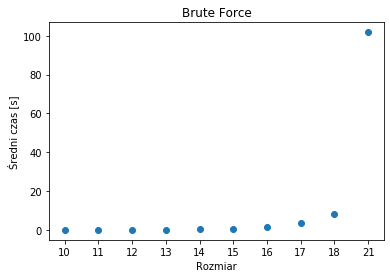

In [129]:
df = df_dp
plt.scatter(df['rozmiar'].astype('str'), df['sredni czas']);
plt.title("Brute Force");
plt.ylabel('Średni czas [s]');
plt.xlabel('Rozmiar');

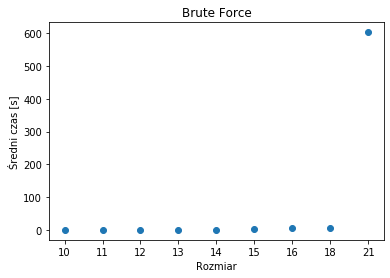

In [122]:
df = df_bb
plt.scatter(df['rozmiar'].astype('str'), df['sredni czas']);
plt.title("Brute Force");
plt.ylabel('Średni czas [s]');
plt.xlabel('Rozmiar');